## Исследование данных о российском кинопрокате



**В рамках данного проекта** анализируются данные по рынку российского кинопропрокатов, в том числе фильмы, снятые при помощи государственной поддержки. Заказчиком является Министерство культуры Российской Федерации.

**Цель проекта:** выявить основные тенденции в области рынка российского кинопрокатов. 

**Набор данных** содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Перед началом работы импортируем библиотеку `pandas`, а также сохраним оба дата-сеты в соотствутствующие переменные. Так как на данном этапе нам важно объединить таблицы, то изменим формат колонки `puNumber` в первом дата-сете на `float` для упрощения процедуры объединения (в первом дата-сете присутствуют как числовые, так и строчные значения, поэтому вторые принудительно заменим на `NaN`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
mkrf_movies = pd.read_csv('./mkrf_movies.csv')
mkrf_shows = pd.read_csv('./mkrf_shows.csv')
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

Так как в задании сказано, что все данные из `mkrf_movies` должны обязательно войти в объединенный дата-фрейм, то выведем основную информацию о дата-сетах `mkrf_shows` и `mkrf_movies` для того, чтобы понимать, что данные не были утеряны.

In [3]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Видим, что данные присутствуют не во всех колонках: например, имеются пропуски в колонках `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres` и `box_office`, то есть при объединении таблиц будут пропуски, с которыми необходимо будет поработать на этапе предобработки данных. Объединим таблицы: при этом для того, чтобы часть данных из `mkrf_movies` не была потеряна, объединять будем по нему.

In [5]:
data = mkrf_movies.merge(mkrf_shows, how='left', on='puNumber')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

После объединения таблиц видим, что данные присутствуют также не во всех колонках: имеются пропуски в колонках `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres` и `box_office`, однако совокупный объем данных при этом равен объему исходного дата-сета `mkrf_movies` (7486 наблюдений), то есть объединение таблиц по условиям задачи прошло корректно. Также часть данных представлена не в верном формате.

In [6]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

В дата-сете присутствуют некорректные типы данных: `show_start_date` необходимо поменять в формат datetime, а `ratings` в float.

In [7]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y.%m.%dT%H:%M:%S')
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме
Для последующей обработки пропусков представим их в более наглядной форме.

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Пропуски в столбцах `director`, `producer` и `genre` заполним значением `неизвестно`: можно было бы, конечно, определить их из открытых источников, но это достаточно проблематично в условиях большого количества данных.

In [9]:
data['director'] = data['director'].fillna('неизвестно')
data['producer'] = data['producer'].fillna('неизвестно')
data['genres'] = data['genres'].fillna('неизвестно')
data['production_country'] = data['production_country'].fillna('неизвестно')

Пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` не заполняем во избежание смещения оценок среднего, медианы и прочих при проведении исследовательского анализа данных: исходя из условий задачи понятно, что те фильмы, значения строк которых не являются пропусками, получали государственную поддержку. Остальные, соответственно, нет.

Пропуски в столбце `box_office` заполним средним значением по каждому жанру: хоть это и примерная оценка, но при этом анализ окажется более содержательным.

In [10]:
for t in data['genres'].unique():
    data.loc[(data['genres'] == t) & (data['box_office'].isna()), 'box_office'] = \
    data.loc[(data['genres'] == t), 'box_office'].mean()

Также имеется небольшое количество пропусков в столбце `ratings`: думаю, что можно заполнить их также на основе среднего значения рейтинга каждой киностудии (можно было бы обратиться к режиссерам или продюссерам, но значений в итоге получается все равно мало).

In [11]:
for t in data['film_studio'].unique():
    data.loc[(data['film_studio'] == t) & (data['ratings'].isna()), 'ratings'] = \
    data.loc[(data['film_studio'] == t), 'ratings'].mean()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Видим, что пропуски, которые мы стремились заполнить, оказались заполненными, а те, по отношению к которым приняли решение оставить без заполнения - остались, соответственно, такими.

Рассмотрим пропуски после принятых решений по заполнению.

In [13]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,0.000000
age_restriction,0.000000
refundable_support,96.000000


Видим, что пропусков стало значительно меньше и в тех колонках, в которых и планировалось заполнение.

#### Шаг 2.3. Изучите дубликаты в датафрейме
Проверим, есть ли в данных дубликаты. Вероятно, что если они и присутствуют, то в столбце `puNumber`, так как он является своего рода идентификатором для каждого фильма.

In [14]:
data['puNumber'].duplicated().sum()

2

Видим, что в дата-фрейме присутствует 2 дубликата. Избавимся от них.

In [15]:
data['puNumber'] = data['puNumber'].drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Количество дубликатов по всему дата-сету равно нулю.

#### Шаг 2.4. Изучите категориальные значения

Выведем первые 30 фильмов для анализа общих тенденций среди категориальных данных.

In [16]:
data.head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама","15,522,807.02"
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный","8,201,172.90"
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96"
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96"
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96"
5,Остановился поезд,"111,013,816.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,"16,822,613.85"
6,Любовь и голуби,"111,007,013.00",2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,"221,074,614.00",2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия","57,701,453.91"
8,Отпетые мошенники.,"121,011,416.00",2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал","23,439,081.92"
9,Отпуск за свой счет,"111,019,114.00",2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия","10,534,687.26"


Видим, что общей особенностью среди практически всех категориальных данных является отсутствие единого формата записи: например, в столбце `production_country` перечисление ведется как через запятую, так и через дефис. 

In [17]:
data['production_country'] = data['production_country'].str.replace('-','')
data['production_country'] = data['production_country'].str.replace('-',' ')
data['production_country'] = data['production_country'].str.replace(',',' ')
data['production_country'] = data['production_country'].str.replace(', ',' ')

В поле `type` встречается проблема: некоторые значения в начале строки содержат пробелы, что порождает неявные дубликаты. Избавимся от этих пробелов.

In [18]:
data['type'] = data['type'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

Рассчитаем показатели описательной статистики для характеристики количественных значений.

In [19]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,483.00",332.00,332.00,332.00,"6,809.00","7,159.00"
mean,"135,173,626.78","11,864,457.83","48,980,988.89","127,229,716.68",6.47,"69,698,993.21"
std,"38,332,314.26","24,916,555.26","59,980,117.92","188,588,333.12",1.12,"181,328,178.07"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,068.00",0.00,"25,000,000.00","42,000,000.00",5.90,"1,872,480.25"
50%,"121,015,419.00",0.00,"30,000,000.00","68,649,916.00",6.60,"16,822,613.85"
75%,"124,003,312.50","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"50,021,111.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


Также рассмотрим дата-сет на наличие аномальных значений, построим для этого боксплоты сразу же для всех столбцов. При этом столбец `puNumber` представляет собой категориальное значение, поэтому его рассматривать не будем.

<Axes: >

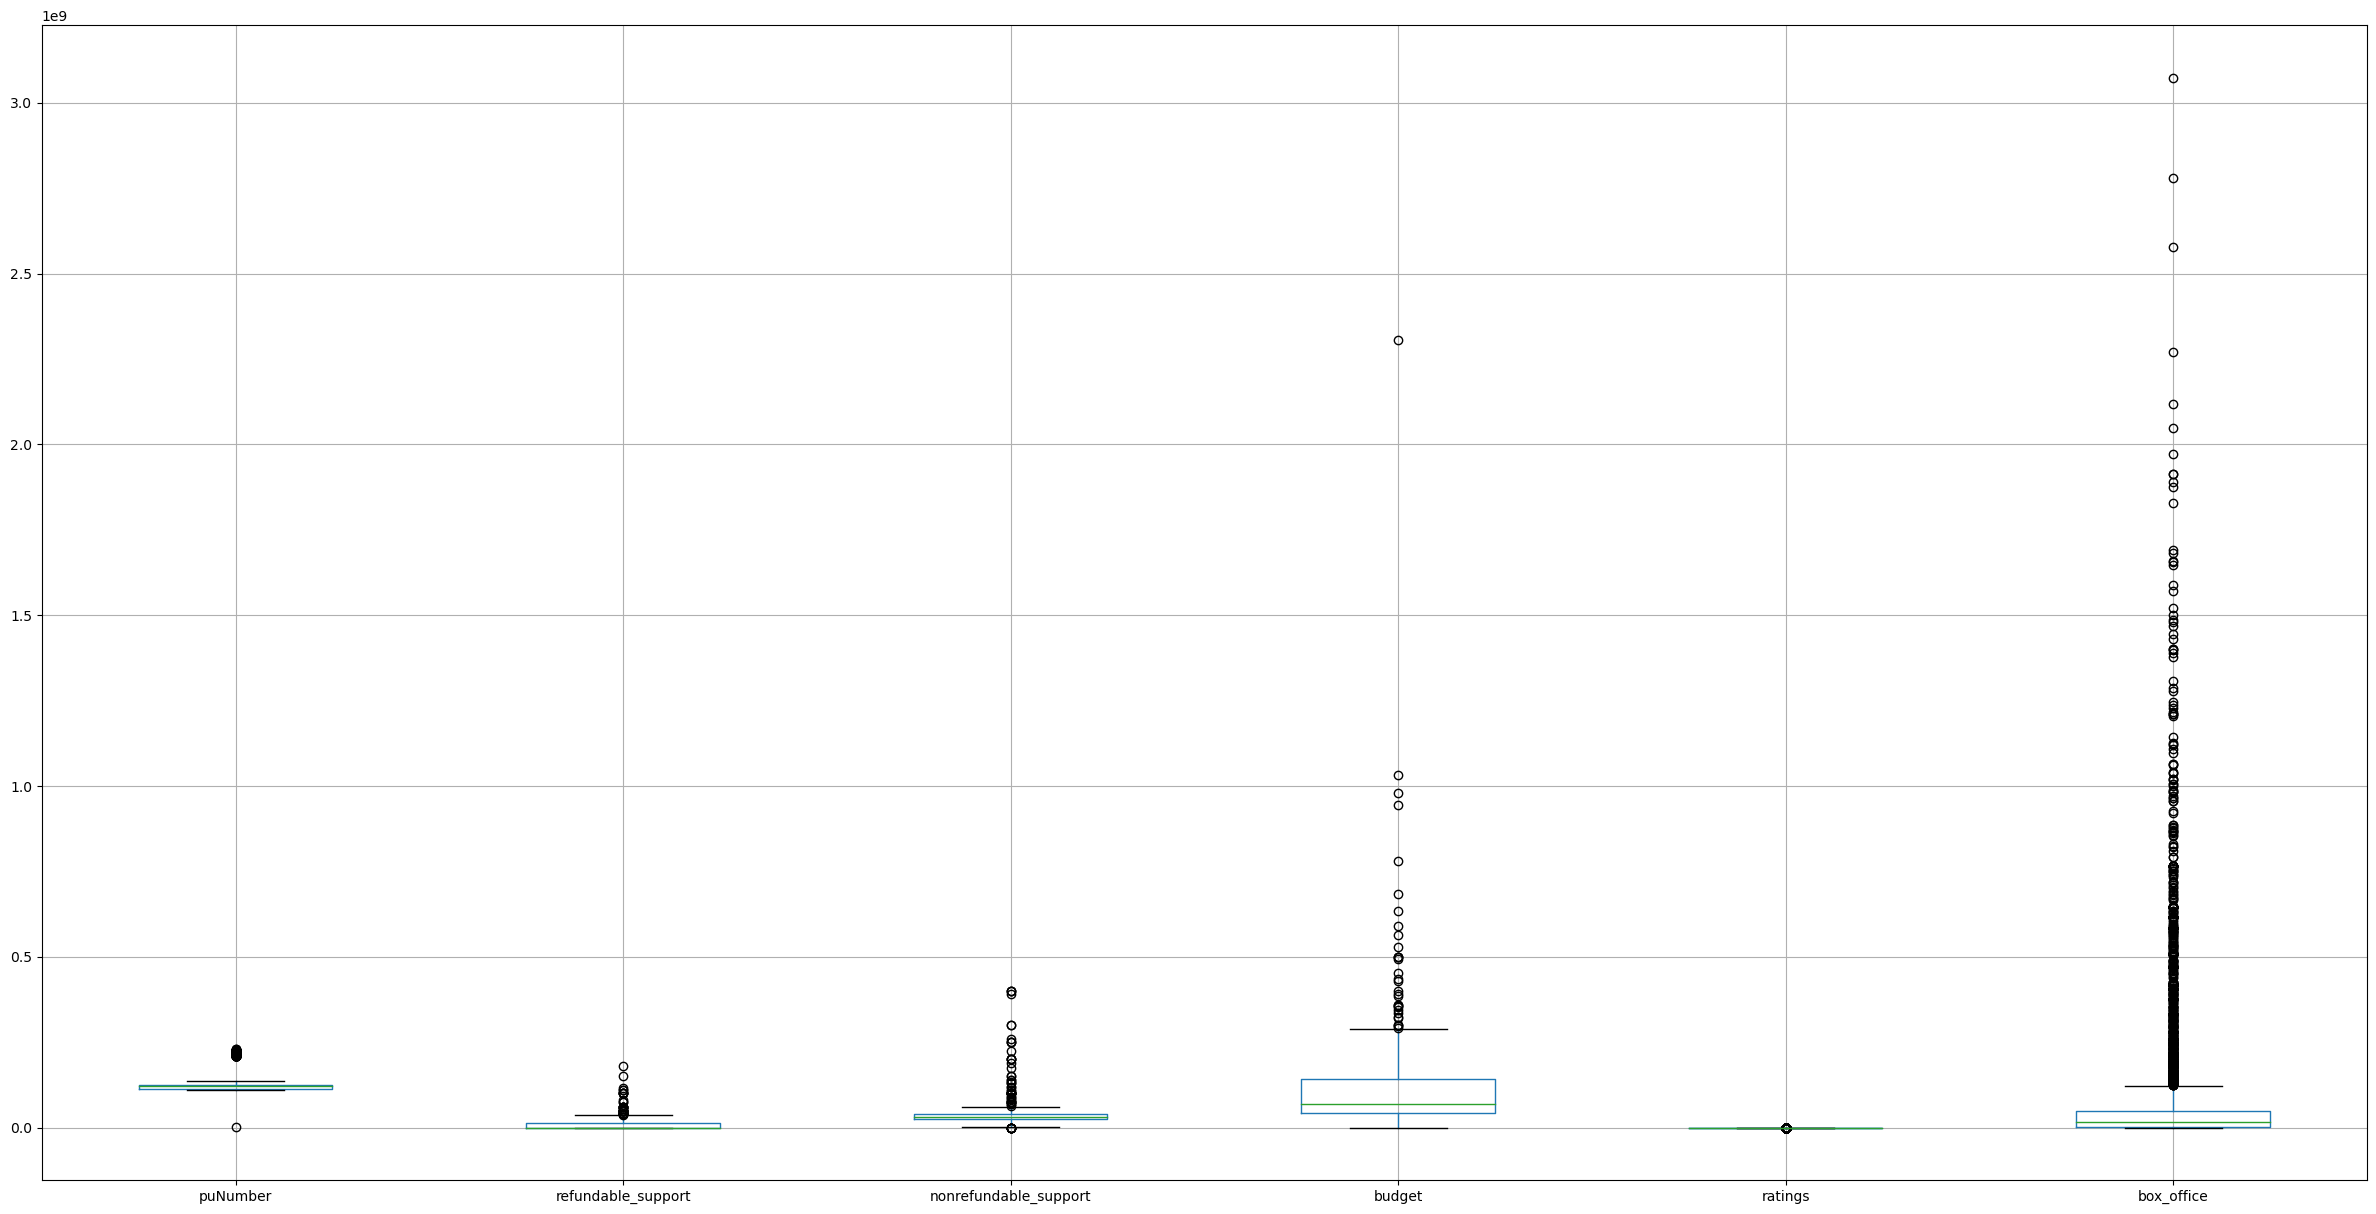

In [20]:
data.boxplot(figsize=(30,15))

Видим, что аномальные значения встречаются в столбцах `refuntable_support`, `nonrefundable_support`, `budget`, а также `box_office` в аналогичном порядке по возрастанию данных значений. Логично предположить, что бюджет фильма, как и кассовые сборы, могут принимать аномально большие значения в зависимости от фильма.

Так как бюджет фильма включает в себя государственную поддержку, то сумма помощи от государства не может превышать бюджет в целом. Можно допустить, что государство полностью оплатило производство фильма, но превышение суммы помощи над бюджетом не логично. Проверим, встреются ли такие значения в дата-сете.

In [21]:
data.query('(refundable_support + nonrefundable_support) > budget').count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  17
genres                   17
box_office               17
dtype: int64

In [22]:
data.query('(refundable_support + nonrefundable_support) > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Видим, что таких фильмов всего 17, а это около 0.01% от всей совокупности или 5% от фильмов с государственной поддержкой. Восстановить данные вряд ли можно, поэтому избавимся от них для того, чтобы не смещать последующие оценки.

In [23]:
data = data.drop(data.query('(refundable_support + nonrefundable_support) > budget').index)

#### Шаг 2.6. Добавьте новые столбцы





Создадим столбец с информацией о годе проката фильма.

In [24]:
data['release_year'] = data['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.

In [25]:
def define_the_first_value(string):
    values_list = list(string.split(','))
    return values_list[0]

data['main_director'] = data['director'].apply(define_the_first_value)
data['main_genre'] = data['genres'].apply(define_the_first_value)

Рассчитаем долю государственной поддержки от общего бюджета фильма.

In [26]:
data['goverment_support_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

Проверим, все ли столбцы рассчитались так, как было необходимо.

In [27]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,goverment_support_share
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама","15,522,807.02",2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный","8,201,172.90",2016,Е.Матвеев,драма,NaN
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96",2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96",2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер","216,907,489.96",2015,Тимур Бекмамбетов,фантастика,NaN


**Промежуточный вывод по этапу предобработки данных:**

В ходе работы были приняты следующие решения:
- **во-первых, изучены и заполнены пропуски там, где это возможно и необходимо**, в частности, в столбцах `director`, `producer`, `genre` - заполнены на "неизвестно", так как эту часть данных восстановить невозможно, а также `box_office` и `ratings` по медианным значениям других категориальных переменных (по жанрам фильмов и по киностудии).
- **во-вторых, были изменены типы данных в тех столбцах, где они представляли некорректное значение:** в частности, в `show_start_date` и `ratings` - со строчного типа (object) на формат datetime и float. 
- **в-третих, были убраны явные дубликаты в размере двух штук.**
- **в-четвертых, были проанализирвоаны категориальные и количественные переменные**, что привело к тому, что были убраны неявные дубликаты, а также некорректные значения, где совокупная поддержка превышала бюджет фильма.
- **в-пятых, были добавлены вспомогательные столбцы:** в частности, с годом выпуска фильма, именем главного режиссера и основным жанром. 

Полученные результаты будут использоваться в дальнейшем при проведении исследовательского анализа данных. 

### Шаг 3. Проведите исследовательский анализ данных


Прежде всего проанализируем количество фильмов, выходивших в прокат каждый год. При этом важно понимать, что в дата-сете отсутсвует ряд данных, поэтому сначала рассчитаем количество недостающих данных по столбцу `box_office` для определения того, критично ли количество отсутствующих данных или нет.

In [28]:
data['box_office'].count() / data['title'].count()

0.9562190386932655

Видим, что отсутствуют около 5% данных: это не критический показатель, поэтому построим сводную таблицу для проведения исследовательского анализа данных на предмет того, какие суммы собрали фильмы в разные годы.

In [29]:
data.pivot_table(index='release_year', values='puNumber', aggfunc='count')

,puNumber
release_year,
2010,985
2011,622
2012,593
2013,630
2014,805
2015,699
2016,815
2017,503
2018,887


Для анализа динамики прокатов построим столбчатую диаграмму.

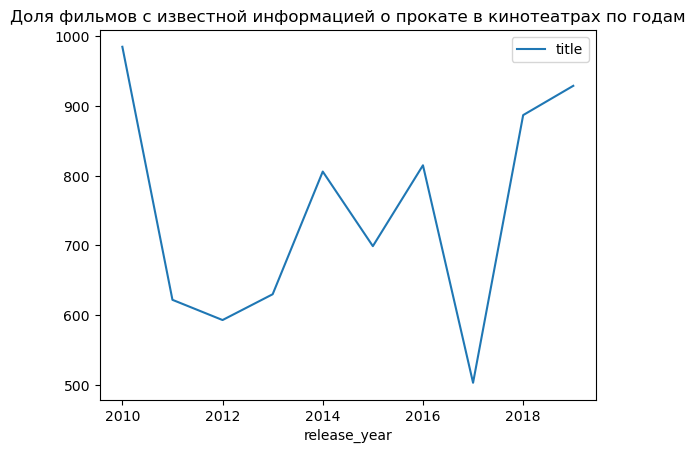

In [30]:
data.pivot_table(index='release_year', values='title', aggfunc='count').plot(title = "Доля фильмов с известной информацией о прокате в кинотеатрах по годам")
plt.show()

Исходя из диаграммы можно заметить, что количество прокатов распределяется по годам неравномерно: так, пиковые значения приходятся на 2010, 2016 и 2018 годы, а минимальные на 2011, 2012, 2013 и 2017 годы. При этом 2014, 2015 и 2016 годы представляют собой промежуточные значения по количеству прокатов. Далее рассчитаем среднее и медианное значения по сборам прокатов в зависимости от года, а также снова построим столбчатую диаграмму для проведения последующего анализа.

In [31]:
data.pivot_table(index='release_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
release_year,,
2010,"69,182,691.71","26,261,685.42"
2011,"54,917,587.38","19,691,467.52"
2012,"58,714,084.93","18,271,055.18"
2013,"44,597,210.05","16,822,613.85"
2014,"45,797,610.50","13,058,019.42"
2015,"78,668,899.54","14,978,689.90"
2016,"83,450,319.98","12,555,250.48"
2017,"111,319,280.90","16,822,613.85"


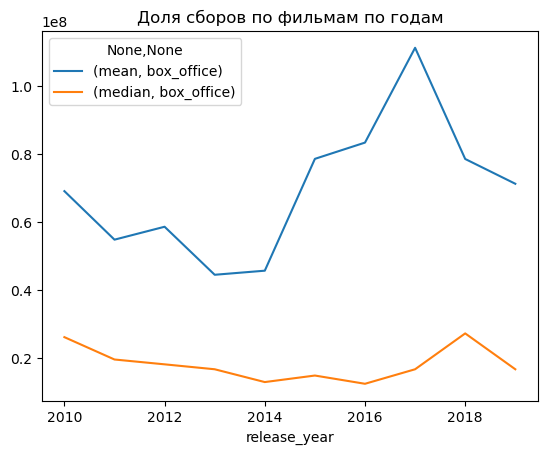

In [32]:
data.pivot_table(index='release_year', values='box_office', aggfunc=['mean', 'median']).plot(title='Доля сборов по фильмам по годам')
plt.show()

На графике можно заметить несколько тенденций:
- во-первых, среднее значение достаточно сильно превышает медианное, а также менее однородно. Подобное очевидно: так как среднее значение не устойчиво к неоднородным значениям или аномальным, то зачастую оценки оказываются смещенными, поэтому для последующего анализа предлагается использовать именно медианное значение.
- во-вторых, по общей тенденции сборов: в целом, количество сборов имеет тенденцию к снижению с 2010 по 2014 годы (среднее значение, кстати, это также показывает), а с 2015 по 2017 года - к росту. При этом пиковое значение достигается в 2018 году, а в 2019 снова идет на спад.

Также проанализируем зависимость сборов от возрастного ограничения: для этого также рассчитаем медианное значение и построим столбчатую диаграмму для большей наглядности. Так как возрастное ограчение представляет собой категориальные данные, то стоит воспользоваться именно средним или медианным значением, так как коэффициент корелляции здесь не подойдет.

In [33]:
data.pivot_table(index='age_restriction', values='box_office', aggfunc='median')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"36,055,705.07"
«12+» - для детей старше 12 лет,"18,958,074.00"
«16+» - для детей старше 16 лет,"16,822,613.85"
«18+» - запрещено для детей,"16,822,613.85"
«6+» - для детей старше 6 лет,"17,553,731.12"


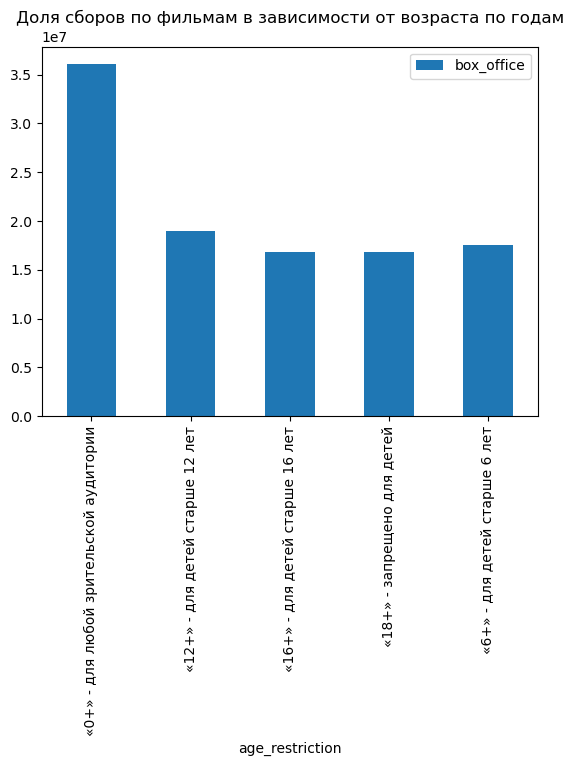

In [34]:
data.pivot_table(index='age_restriction', values='box_office', aggfunc='median').plot(kind='bar', title='Доля сборов по фильмам в зависимости от возраста по годам')
plt.show()

Исходя из графика можно заметить, что больше всего сборов получили фильмы, предназначенные для любой аудитории, то есть широкого профиля зрителей, а оставшиеся возрастные группы, в целом, принимают более-менее однородные значения: единственное отличие заключается в том, что категории фильмов 12+ и 6+ собирают немного больше кассовых сборов, чем категории фильмов 16+ и 18+. Также проанализируем взаимосвязь возрастных ограничений с кассовыми сборами, но только среди фильмых, которые были выпущены в период с 2015 по 2019 годы, так как в эти периоды наблюдается тенденция к росту по количеству кассовых сборов. Прежде всего, отфильтруем данные, а потом построим аналогичные таблицу и диаграмму с медианным значением.

In [35]:
data_filtered_by_release_year = data.query('release_year >= 2015')
data_filtered_by_release_year.pivot_table(index='age_restriction', values='box_office', aggfunc='median')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"36,055,705.07"
«12+» - для детей старше 12 лет,"25,872,199.22"
«16+» - для детей старше 16 лет,"14,857,951.11"
«18+» - запрещено для детей,"12,300,474.55"
«6+» - для детей старше 6 лет,"30,325,879.15"


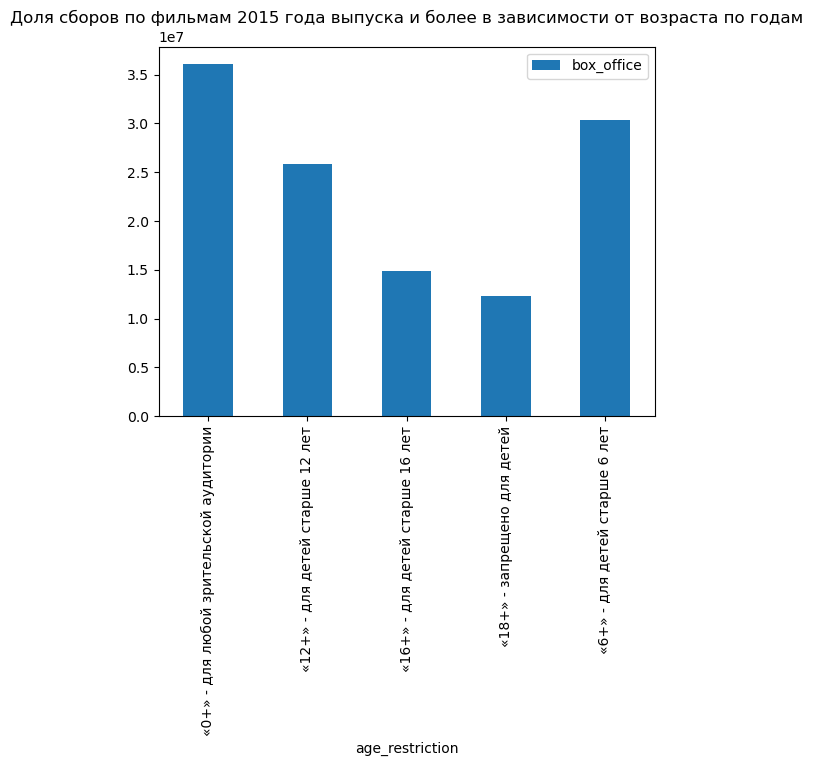

In [36]:
data_filtered_by_release_year.pivot_table(index='age_restriction', values='box_office', aggfunc='median').plot(kind='bar', title='Доля сборов по фильмам 2015 года выпуска и более в зависимости от возраста по годам')
plt.show()

Также сравним среднеее и медианное значение при помощи боскплотов.

<Axes: >

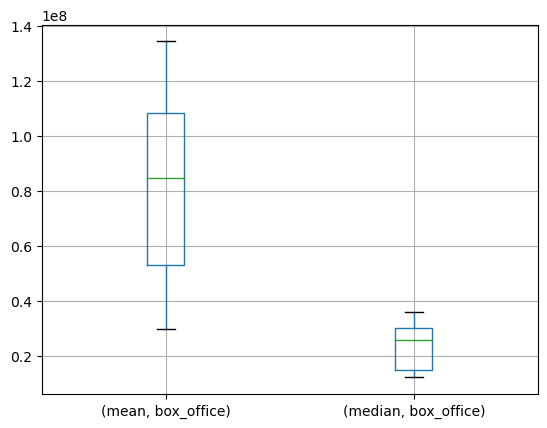

In [37]:
data_filtered_by_release_year.pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'median']).boxplot()

Видим, что среднее значение значительно превышает медианное в силу того, что в данных присутствуют аномальные значения, особенно в столбце `box_office`, поэтому выбранное решение использовать медиану для проведения анализа оказалось корректным.

В целом, ситуация аналогичная, однако становится более выраженной тенденция, озвученная раннее: фильмы категории 6+ и 12+ собирают больше сборов, чем 16+ и 18+, а категория 0+ остается лидирующей, так как предназначена для широкого круга зрителей.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

Прежде всего проанализируем совокупное количество средств, которое выделяется государством на производство фильмов в каждом году.

In [38]:
data.pivot_table(index='release_year', values='budget', aggfunc='sum')

,budget
release_year,
2010,0.00
2011,0.00
2012,0.00
2013,"255,435,390.00"
2014,"1,279,484,783.00"
2015,"7,309,669,207.00"
2016,"7,228,942,748.00"
2017,"6,972,172,568.00"
2018,"6,651,694,634.00"


<Axes: xlabel='release_year'>

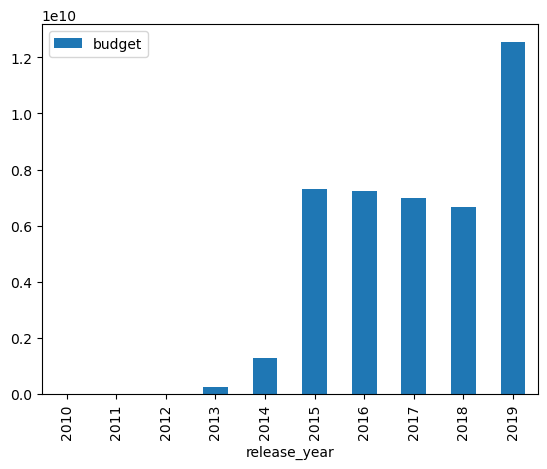

In [39]:
data.pivot_table(index='release_year', values='budget', aggfunc='sum').plot(kind='bar')

На графике можно заметить, что государственная поддержка в области кинопроизводства началась примерно в 2013 году и, в среднем, имеет тенденцию к росту несмотря на небольшое количество спадов в период с 2016 по 2018 годы. Пиковое значение достигается в 2019 году, при этом если сравнить его с показателем за 2013 год, то можно понять, что превышается он достаточно сильно. Также посмотрим на окупаемость данных фильмов.

In [40]:
data['profit'] = data['box_office'] - data['budget']
data.pivot_table(index='release_year', values='profit', aggfunc='median')

,profit
release_year,
2013,"-117,556,502.45"
2014,"-39,130,819.00"
2015,"-39,851,256.00"
2016,"-54,087,070.50"
2017,"-35,328,950.00"
2018,"-38,495,370.81"
2019,"-45,780,330.56"


<Axes: xlabel='release_year'>

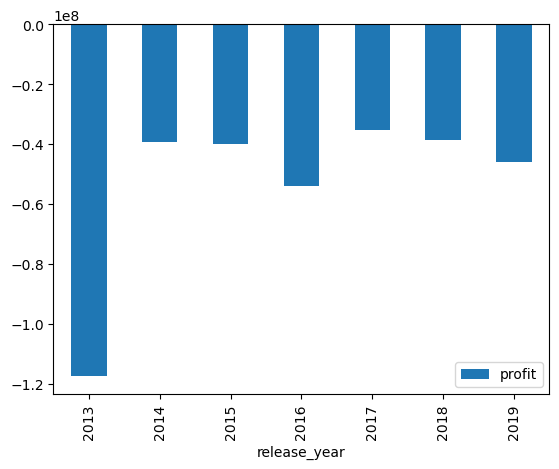

In [41]:
data.pivot_table(index='release_year', values='profit', aggfunc='median').plot(kind='bar')

Исходя из графика можно заметить, что практически все фильмы с государственной поддержкой не окупаются. Наконец, проанализируем рейтинг таких фильмов. Сначала рассмотрим медианный рейтинг жанров фильмов по годам.

In [42]:
data.pivot_table(index='release_year', columns='main_genre', values='ratings', aggfunc='median')

main_genre,аниме,биография,боевик,вестерн,военный,детектив,детский,для взрослых,документальный,драма,...,неизвестно,приключения,реальное ТВ,семейный,спорт,триллер,ужасы,фантастика,фильм-нуар,фэнтези
release_year,,,,,,,,,,,,,,,,,,,,,
2010,8.10,6.70,6.90,NaN,7.85,7.00,1.55,NaN,7.40,7.00,...,7.20,5.30,NaN,5.70,NaN,6.90,6.20,6.95,NaN,6.90
2011,7.65,7.70,6.80,NaN,6.80,6.85,7.20,4.10,7.10,6.80,...,7.47,NaN,NaN,5.45,NaN,7.20,5.90,7.00,NaN,6.55
2012,7.50,NaN,6.75,8.20,7.90,7.70,7.20,NaN,7.60,6.80,...,7.60,4.75,NaN,6.15,8.00,6.60,5.80,6.75,NaN,6.60
2013,7.70,7.10,6.30,7.35,6.95,8.10,5.90,NaN,6.90,7.10,...,7.20,7.30,NaN,4.60,8.10,6.60,5.40,6.80,NaN,6.30
2014,7.60,6.10,6.70,NaN,6.30,6.20,7.20,NaN,7.15,6.90,...,7.20,6.20,NaN,5.20,6.45,6.60,5.30,6.80,7.60,6.70
2015,7.40,7.70,6.90,7.90,6.45,6.45,7.20,NaN,7.40,6.70,...,6.92,6.55,NaN,5.95,7.25,6.35,5.60,6.40,NaN,6.20
2016,7.45,6.70,6.40,NaN,7.40,NaN,7.25,4.65,7.40,6.70,...,5.80,6.60,NaN,4.80,6.30,6.60,5.70,6.70,NaN,6.80
2017,8.30,NaN,6.20,NaN,6.30,6.80,7.20,NaN,7.45,6.70,...,5.82,6.90,NaN,5.50,7.50,6.30,5.70,6.55,NaN,6.10
2018,7.50,7.10,6.20,NaN,6.25,6.50,7.20,NaN,7.25,6.70,...,6.40,6.30,NaN,6.25,7.00,6.30,5.70,6.20,NaN,6.45


Видим, что жанрами с наибольшим рейтингом являются аниме (правда, с тенденцией к ухудшению рейтинга) и документальные фильмы, а жанр с наименьшим рейтингом - семейный, хоть и с тенденцией к росту. Прочие жанры более-менее однородны в рамках рейтинга.

<Axes: >

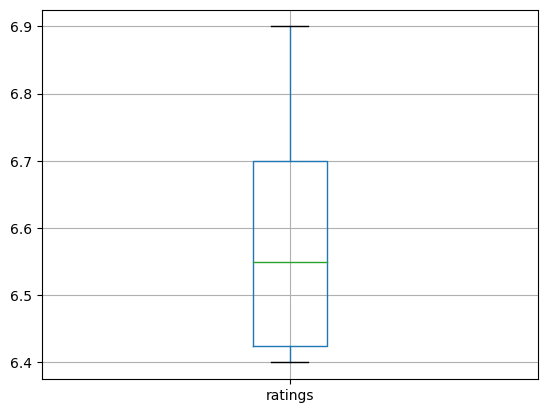

In [43]:
data.pivot_table(index='release_year', values='ratings', aggfunc='median').boxplot()

Видим, что медианное значение по рейтингу у всех фильмов практически одинаковое: в районе 6.5-6.6 баллов. В целом, данный рейтинг является чуть выше среднего, поэтому можно сказать о том, что фильмы, поддерживаемые государством, не вызывают особо восторга среди зрителей.

**Промежуточный вывод по этапу исследовательского анализа данных:**

В ходе проведения исследовательского анализа данных были получены следующие результаты:
- **во-первых, при анализе количества прокатов выяснили**, что пиковые значения приходятся на 2010, 2016 и 2018 годы, а минимальные на 2011, 2012, 2013 и 2017 годы. При этом 2014, 2015 и 2016 годы представляют собой промежуточные значения по количеству прокатов. Отметим, что часть фильмов (около 1%) не поступали в прокат, но на результат исследования не влияют, так как представляют собой небольшое значение.
- **во-вторых, при анализе количества сборов выяснили**, что они имеют тенденцию к снижению с 2010 по 2014 годы (среднее значение, кстати, это также показывает), а с 2015 по 2017 года - к росту. При этом пиковое значение достигается в 2018 году, а в 2019 снова идет на спад. Отметим, что основным показателем при анализе использовалось медианное значение в силу того, что оно более устойчиво к неоднородным выборкам, а также аномальным значениям.
- **в-третьих, при анализе взаимосвязи количества сборов в зависимости от возврастной группы выяснили**, что больше всего сборов получили фильмы, предназначенные для любой аудитории, то есть широкого профиля зрителей, а оставшиеся возрастные группы, в целом, принимают более-менее однородные значения: единственное отличие заключается в том, что категории фильмов 12+ и 6+ собирают немного больше кассовых сборов, чем категории фильмов 16+ и 18+. При этом при анализе фильмов с 2015 по 2017 годы, то есть в период роста кассовых сборов, тенденция становится более явной.
- **в-четвертых, при анализе фильмов с государственной поддержкой выяснили**, что сама поддержка начинается примерно в 2013 году и, в среднем, имеет тенденцию к росту несмотря на небольшое количество спадов в период с 2016 по 2018 годы. Пиковое значение достигается в 2019 году, при этом если сравнить его с показателем за 2013 год, то можно понять, что превышается он достаточно сильно.
- **в-пятых, практически все фильмы с государственной поддержкой являются убыточными**, однако при этом обладают средним рейтингом в районе 6.5-6.6 баллов, поэтому, возможно, не вызывают особый восторг у зрителей.

### Шаг 5. Напишите общий вывод

В ходе проведенного анализа были проделаны следующие работы и получена соответствующая информация:

**В рамках этапа предобработки данных:**
- **изучены и заполнены пропуски там, где это возможно и необходимо**, в частности, в столбцах `director`, `producer`, `genre` - заполнены на "неизвестно", так как эту часть данных восстановить невозможно, а также `box_office` и `ratings` по медианным значениям других категориальных переменных (по жанрам фильмов и по киностудии).
- **изменены типы данных в тех столбцах, где они представляли некорректное значение:** в частности, в `show_start_date` и `ratings` - со строчного типа (object) на формат datetime и float. 
- **браны явные дубликаты в размере двух штук.**
- **проанализирвоаны категориальные и количественные переменные**, что привело к тому, что были убраны неявные дубликаты, а также некорректные значения, где совокупная поддержка превышала бюджет фильма.
- **добавлены вспомогательные столбцы:** в частности, с годом выпуска фильма, именем главного режиссера и основным жанром. 

**В рамках этапа исследовательского анализа данных:**
- **при анализе количества прокатов выяснили**, что пиковые значения приходятся на 2010, 2016 и 2018 годы, а минимальные на 2011, 2012, 2013 и 2017 годы. При этом 2014, 2015 и 2016 годы представляют собой промежуточные значения по количеству прокатов.  Отметим, что часть фильмов (около 1%) не поступали в прокат, но на результат исследования не влияют, так как представляют собой небольшое значение.
- **при анализе количества сборов выяснили**, что они имеют тенденцию к снижению с 2010 по 2014 годы (среднее значение, кстати, это также показывает), а с 2015 по 2017 года - к росту. При этом пиковое значение достигается в 2018 году, а в 2019 снова идет на спад. Отметим, что основным показателем при анализе использовалось медианное значение в силу того, что оно более устойчиво к неоднородным выборкам, а также аномальным значениям.
- **при анализе взаимосвязи количества сборов в зависимости от возврастной группы выяснили**, что больше всего сборов получили фильмы, предназначенные для любой аудитории, то есть широкого профиля зрителей, а оставшиеся возрастные группы, в целом, принимают более-менее однородные значения: единственное отличие заключается в том, что категории фильмов 12+ и 6+ собирают немного больше кассовых сборов, чем категории фильмов 16+ и 18+. При этом при анализе фильмов с 2015 по 2017 годы, то есть в период роста кассовых сборов, тенденция становится более явной.
- **при анализе фильмов с государственной поддержкой выяснили**, что сама поддержка начинается примерно в 2013 году и, в среднем, имеет тенденцию к росту несмотря на небольшое количество спадов в период с 2016 по 2018 годы. Пиковое значение достигается в 2019 году, при этом если сравнить его с показателем за 2013 год, то можно понять, что превышается он достаточно сильно.
- **практически все фильмы с государственной поддержкой являются убыточными**, однако при этом обладают средним рейтингом в районе 6.5-6.6 баллов, поэтому, возможно, не вызывают особый восторг у зрителей.

Полученные результаты анализа могут быть использованы при планировании дальнейшей деятельности в области кинопроизводства.